In [1]:
import pyleoclim as pyleo
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import json

In [2]:
def transform(obj_dict):
    for k in obj_dict.keys():
        if isinstance(obj_dict[k],(np.ndarray)):
            obj_dict[k] = obj_dict[k].tolist()
        elif isinstance(obj_dict[k],(pyleo.Series,pyleo.Coherence)):
            obj_dict[k]=PyleoObj_to_json(obj_dict[k],dict_return=True)
                   
        elif isinstance(obj_dict[k],(dict)):
            obj_dict[k]=transform(obj_dict[k])
    return obj_dict


def list_to_array(obj_dict):
    for k in obj_dict:
        if type(obj_dict[k])is dict:
            obj_dict[k]=list_to_array(obj_dict[k])
        elif type(obj_dict[k]) is list:
            obj_dict[k]=np.array(obj_dict[k])
        else:
            obj_dict[k]=obj_dict[k]
    return obj_dict

def PyleoObj_to_json(PyleoObj,filename='trial',dict_return=False):
    obj_dict = PyleoObj.__dict__
    obj_dict = transform(obj_dict)
    if dict_return == False:
        with open('./IntermediateOutputs/'+filename+'.json','w') as f:
            json.dump(obj_dict, f)
            f.close()
    elif dict_return == True:
        return  obj_dict

def json_to_Series(filename):
    with  open('./IntermediateOutputs/'+filename+'.json','r') as f:
        t = json.load(f)
    ts = pyleo.Series(time=np.array(t['time']),
                     value=np.array(t['value']),
                     time_name=t['time_name'],
                     time_unit=t['time_unit'],
                     value_name=t['value_name'],
                     value_unit=t['value_unit'],
                     label=t['label']) 
    return ts


def json_to_Coherence(filename):
    with open('./IntermediateOutputs/'+filename+'.json','r') as f:
        t = json.load(f)
    t = list_to_array(t)
    ts1 = t['timeseries1']
    ts2 = t['timeseries2']
    timeseries1 = pyleo.Series(time=np.array(ts1['time']),
                     value=np.array(ts1['value']),
                     time_name=ts1['time_name'],
                     time_unit=ts1['time_unit'],
                     value_name=ts1['value_name'],
                     value_unit=ts1['value_unit'],
                     label=ts1['label']) 
    timeseries2 = pyleo.Series(time=np.array(ts2['time']),
                     value=np.array(ts2['value']),
                     time_name=ts2['time_name'],
                     time_unit=ts2['time_unit'],
                     value_name=ts2['value_name'],
                     value_unit=ts2['value_unit'],
                     label=ts2['label']) 
  
    
    

    coherence= pyleo.Coherence(frequency=(t['frequency']),time = (t['time']),phase = (t['phase']),
                                coi = t['coi'],timeseries1= timeseries1,
                                timeseries2 = timeseries2,signif_qs = t['signif_qs'],
                                signif_method = t['signif_method'],
                               period_unit = t['period_unit'],coherence = (t['coherence']))
    return coherence




# Generating a Sine Signal

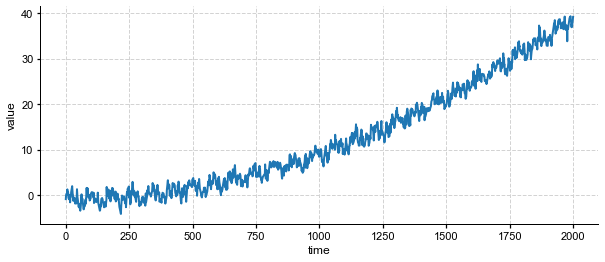

In [3]:

freqs=[1/20,1/80]
time=np.arange(2001)
signals=[]
for freq in freqs:
    signals.append(np.sin(2*np.pi*freq*time))
    
signal=sum(signals)

# Add a non-linear trend
slope = 1e-5
intercept = -1
nonlinear_trend = slope*time**2 + intercept
signal_trend = signal + nonlinear_trend
#signal_trend = signal_out + nonlinear_trend

#Add white noise
sig_var = np.var(signal)
noise_var = sig_var / 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
signal_noise = signal_trend + white_noise

#Remove data points
del_percent = 0.4
n_del = int(del_percent*np.size(time))
deleted_idx = np.random.choice(range(np.size(time)), n_del, replace=False)
time_unevenly =  np.delete(time, deleted_idx)
signal_unevenly =  np.delete(signal_noise, deleted_idx)
ts = pyleo.Series(time_unevenly,signal_unevenly)
PyleoObj_to_json(ts,'ts')
fig,ax = ts.plot()


#  Standardize

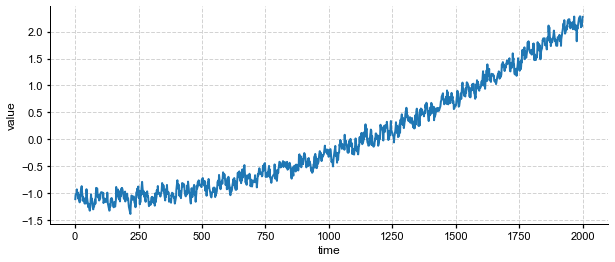

In [4]:
ts = json_to_Series('ts')
ts_std = ts.standardize()
fig,ax = ts_std.plot()
PyleoObj_to_json(ts_std,'ts_std')

# Detrend

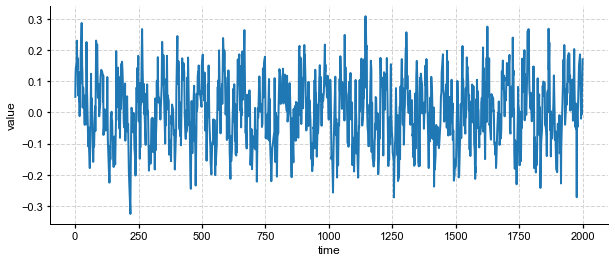

In [5]:
ts_std = json_to_Series('ts_std') 
ts_detrended=ts_std.detrend(method='emd')
fig,ax=ts_detrended.plot()
PyleoObj_to_json(ts_detrended,'ts_detrended')

# Outliers

/Users/pratheek/anaconda3/envs/pyleoclim/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


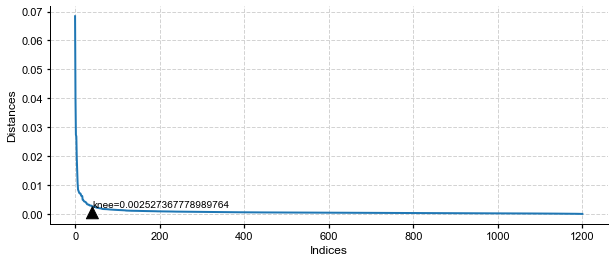

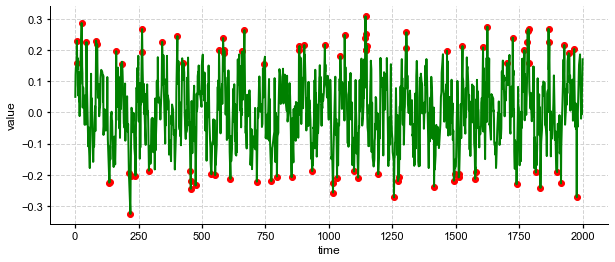

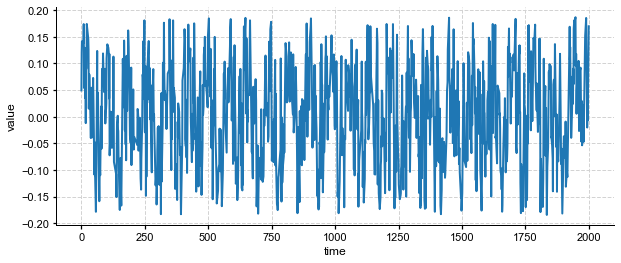

In [6]:
ts_detrended = json_to_Series('ts_detrended')
ts_outliers=ts_detrended.outliers()
PyleoObj_to_json(ts_outliers,'ts_outliers')
fig,ax=ts_outliers.plot()


# Generating a Cos Signal

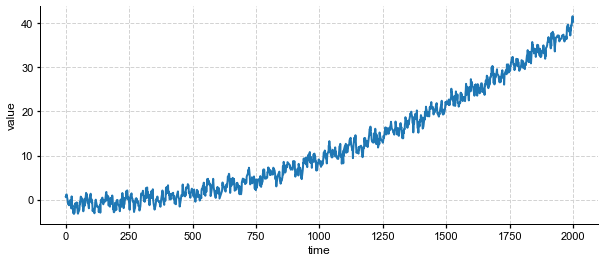

In [7]:
freqs=[1/20,1/80]
time=np.arange(2001)
signals=[]
for freq in freqs:
    signals.append(np.cos(2*np.pi*freq*time))
    
signal2=sum(signals)

# Add a non-linear trend
slope = 1e-5
intercept = -1
nonlinear_trend = slope*time**2 + intercept
signal_trend = signal2 + nonlinear_trend
#signal_trend = signal_out + nonlinear_trend

#Add white noise
sig_var = np.var(signal)
noise_var = sig_var / 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
signal_noise = signal_trend + white_noise

#Remove data points
del_percent = 0.4
n_del = int(del_percent*np.size(time))
deleted_idx = np.random.choice(range(np.size(time)), n_del, replace=False)
time_unevenly =  np.delete(time, deleted_idx)
signal_unevenly =  np.delete(signal_noise, deleted_idx)
ts2 = pyleo.Series(time_unevenly,signal_unevenly)
PyleoObj_to_json(ts2,'ts2')
fig,ax = ts2.plot()


# Standardize

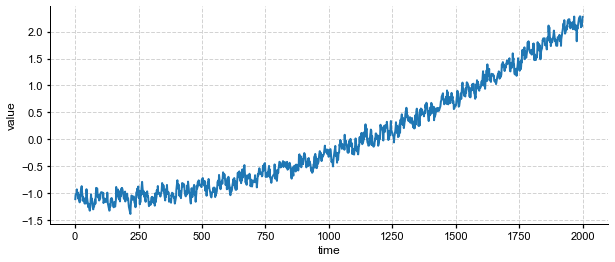

In [8]:
ts2 = json_to_Series('ts2')
ts_std_2 = ts.standardize()
fig,ax = ts_std_2.plot()
PyleoObj_to_json(ts_std_2,'ts_std_2')

# Detrend

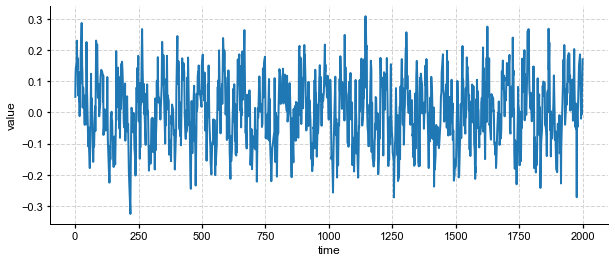

In [9]:
ts_std_2 = json_to_Series('ts_std_2') 
ts_detrended_2=ts_std_2.detrend(method='emd')
fig,ax=ts_detrended_2.plot()
PyleoObj_to_json(ts_detrended_2,'ts_detrended_2')

# Outliers

/Users/pratheek/anaconda3/envs/pyleoclim/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


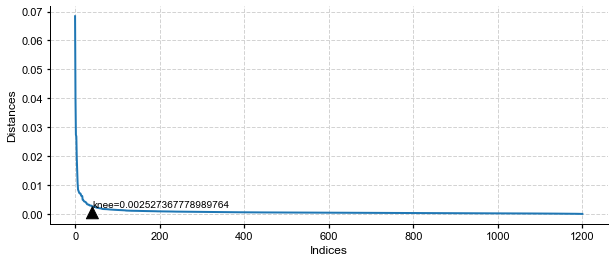

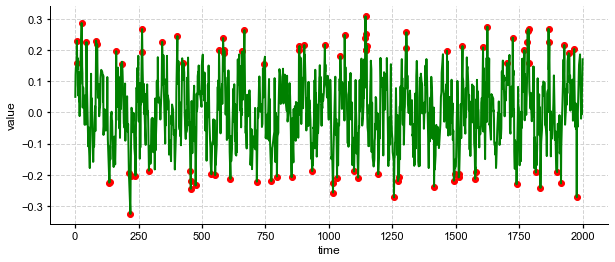

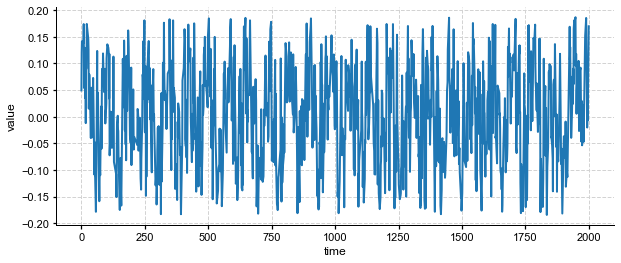

In [10]:
ts_detrended_2 = json_to_Series('ts_detrended_2')
ts_outliers_2=ts_detrended.outliers()
PyleoObj_to_json(ts_outliers_2,'ts_outliers_2')
fig,ax=ts_outliers_2.plot()


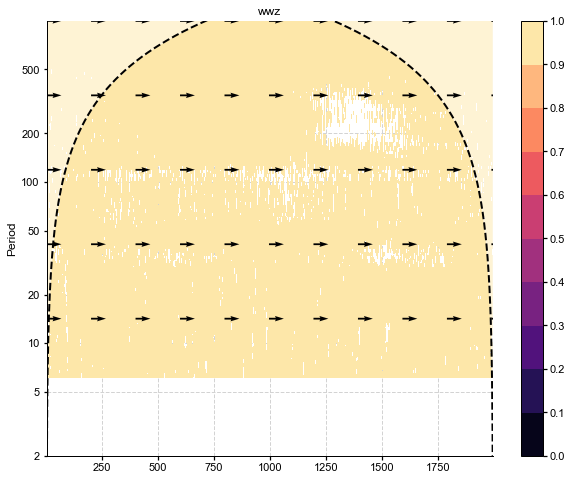

In [11]:
ts_outliers = json_to_Series('ts_outliers')
ts_outliers_2 = json_to_Series('ts_outliers_2')
coh_res = ts_outliers.wavelet_coherence(ts_outliers_2)
coh_res.plot(title='wwz')
plt.show()
PyleoObj_to_json(coh_res,'coh_res')

Performing wavelet coherence on surrogate pairs: 100%|██████████| 200/200 [33:03<00:00,  9.92s/it]


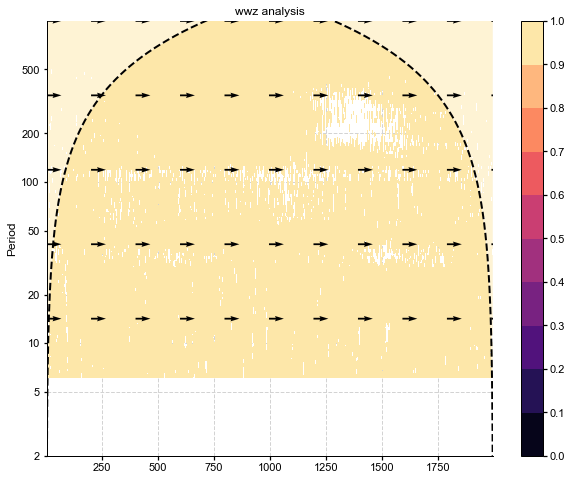

In [16]:
coh_res=json_to_Coherence('coh_res')
coh_signif= coh_res.signif_test(qs=[0.95])
fig,ax=coh_signif.plot(title='wwz analysis')
plt.show()